<a href="https://colab.research.google.com/github/ankitgulshan24/vitalEase/blob/main/Test_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant_Disease_Dataset/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

class_names = validation_set.class_names
print(class_names)

Found 840 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-

In [3]:
cnn = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/trained_plant_disease_model.keras")


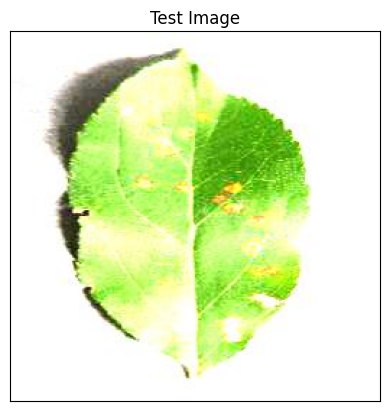

In [4]:
import cv2
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/Plant_Disease_Dataset/Plant_Disease_Dataset/test/test/AppleCedarRust1.JPG"

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


# *Testing *

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [6]:
print(predictions)

[[1.5188408e-03 1.5414179e-04 2.5493883e-02 8.4934327e-06 5.5694208e-03
  7.6071727e-03 3.0597931e-04 1.8459267e-04 4.9111963e-04 9.0030058e-05
  4.8796528e-06 4.9966238e-03 7.6655895e-05 3.4040131e-02 9.1210575e-05
  1.2193516e-01 1.4332883e-03 9.2022910e-06 1.3513773e-02 1.8287777e-04
  1.0049347e-03 1.3118080e-03 5.2185042e-04 6.2929960e-03 2.4403998e-06
  1.3522616e-04 2.4771602e-03 2.0698212e-02 9.3224354e-04 2.2192247e-04
  1.1528156e-03 9.4916736e-04 1.4413731e-02 7.0812675e-05 6.6821090e-06
  7.3199654e-01 3.4216951e-05 6.9795387e-05]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


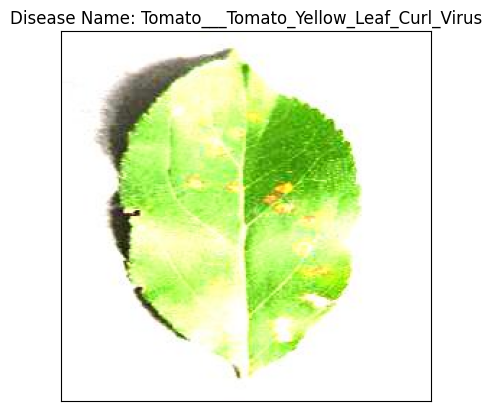

In [9]:
# Displaying the disease prediction
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()